In [7]:
!pip install ultralytics -qq
!pip install pylabel -qq

In [8]:
import zipfile
import os, random, cv2
import matplotlib.pyplot as plt
import ultralytics

from google.colab import drive
from ultralytics import YOLO
from pylabel import importer
from tqdm import tqdm
import matplotlib.image as mpimg


import matplotlib.patches as patches
import json



# Drive & Data download & unzip


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !wget -P /content/drive/MyDrive/COCO2017 http://images.cocodataset.org/zips/train2017.zip
# !wget -P /content/drive/MyDrive/COCO2017 http://images.cocodataset.org/zips/val2017.zip
# !wget -P /content/drive/MyDrive/COCO2017 http://images.cocodataset.org/zips/test2017.zip
# !wget -P /content/drive/MyDrive/COCO2017 http://images.cocodataset.org/annotations/annotations_trainval2017.zip

In [ ]:
# !unzip  /content/drive/MyDrive/COCO2017/train2017.zip -d /content/drive/MyDrive/COCO2017/
# !unzip  /content/drive/MyDrive/COCO2017/val2017.zip -d /content/drive/MyDrive/COCO2017/
# !unzip  /content/drive/MyDrive/COCO2017/annotations_trainval2017.zip -d /content/drive/MyDrive/COCO2017/
# !unzip  /content/drive/MyDrive/COCO2017/test2017.zip -d /content/drive/MyDrive/COCO2017/

In [ ]:
############################
# !unzip /content/drive/MyDrive/COCO2017/train2017.zip -d /content/drive/MyDrive/coco_yolo/train
# !unzip  /content/drive/MyDrive/COCO2017/val2017.zip -d /content/drive/MyDrive/coco_yolo/val
# !unzip  /content/drive/MyDrive/COCO2017/test2017.zip -d /content/drive/MyDrive/coco_yolo/test
# !unzip  /content/drive/MyDrive/COCO2017/annotations_trainval2017.zip -d /content/drive/MyDrive/coco_yolo/annotations_trainval2017


# Paths


In [9]:
# مسار فولدر الصور

train_dir = "/content/drive/MyDrive/COCO2017/train2017"


In [11]:
# مسار فولدر الصور
test_dir = "/content/drive/MyDrive/COCO2017/test2017"

In [13]:
annot_path = "/content/drive/MyDrive/COCO2017/annotations/instances_train2017.json"


# Visualization


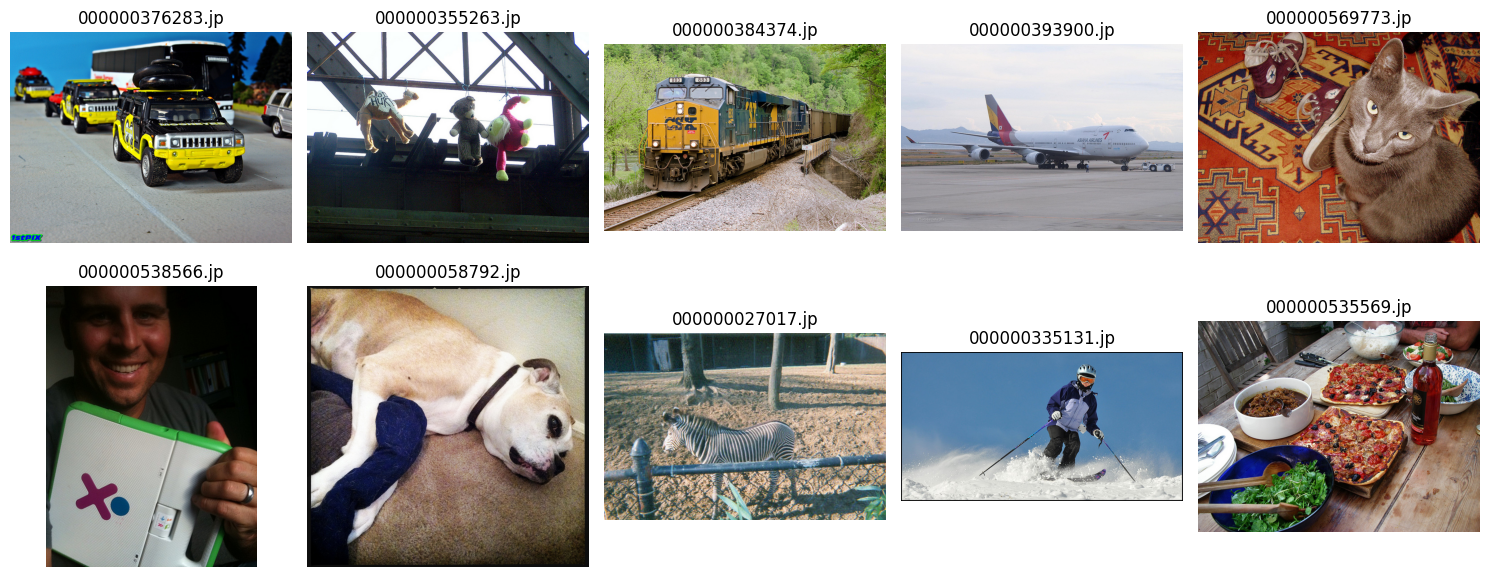

In [12]:
# نستخدم generator بدل ما نحمل كل الأسماء في list
def get_random_images(path, n=10):
    images = []
    with os.scandir(path) as entries:
        all_entries = list(entries)
        chosen = random.sample(all_entries, n)
        for entry in chosen:
            if entry.is_file() and entry.name.endswith(".jpg"):
                images.append(entry.path)
    return images

# نجيب 10 صور عشوائية
sample_images = get_random_images(train_dir, 10)

# نعرضهم
plt.figure(figsize=(15, 6))
for i, img_path in enumerate(sample_images):
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(img_path)[:15])
plt.tight_layout()
plt.show()


In [14]:
# تحميل ملف الـ annotations
with open(annot_path, "r") as f:
    coco = json.load(f)


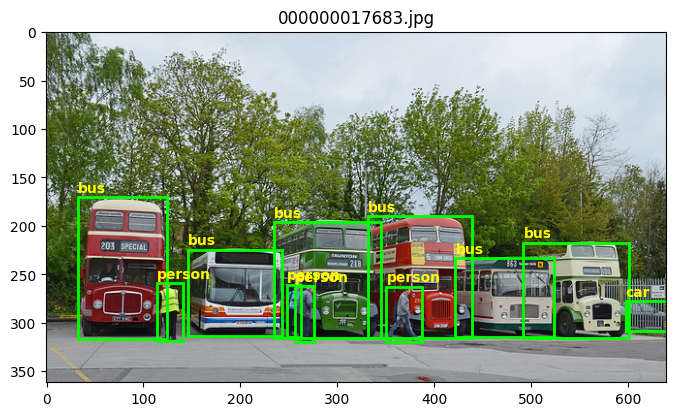

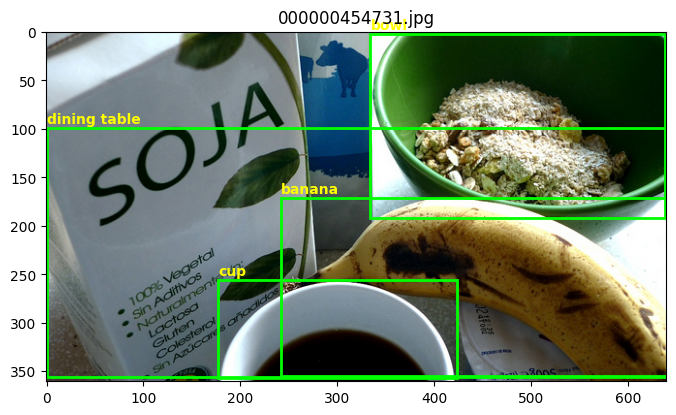

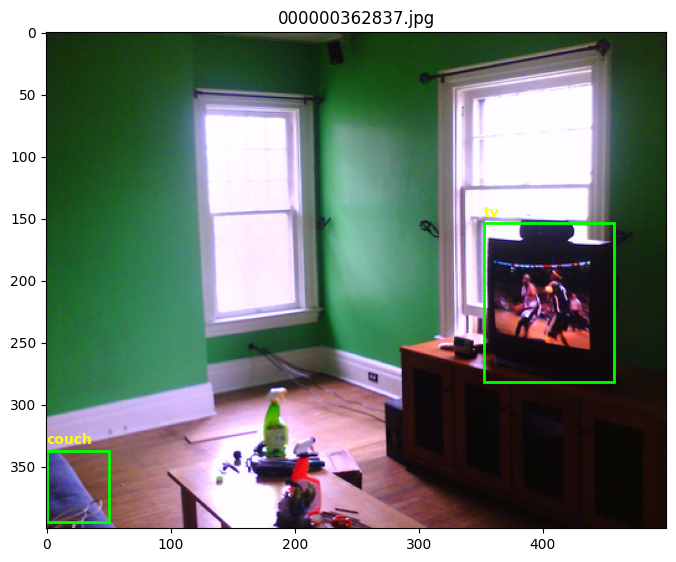

In [15]:

images = coco["images"]
annotations = coco["annotations"]
categories = {c["id"]: c["name"] for c in coco["categories"]}

# نختار 3 صور عشوائيًا (عشان ما يطولش العرض)
sample_images = random.sample(images, 3)

for img_info in sample_images:
    img_id = img_info["id"]
    file_name = img_info["file_name"]
    img_path = os.path.join(train_dir, file_name)

    # نجيب كل الـ annotations الخاصة بالصورة دي
    anns = [a for a in annotations if a["image_id"] == img_id]

    # نعرض الصورة
    img = plt.imread(img_path)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(img)
    ax.set_title(file_name)

    # نرسم المربعات لكل annotation
    for a in anns:
        bbox = a["bbox"]  # [x, y, width, height]
        category_id = a["category_id"]
        label = categories[category_id]

        rect = patches.Rectangle(
            (bbox[0], bbox[1]),
            bbox[2],
            bbox[3],
            linewidth=2,
            edgecolor='lime',
            facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(bbox[0], bbox[1]-5, label, color='yellow', fontsize=10, weight='bold')

    plt.show()


# Validations

In [16]:
# عدّ كل الملفات داخل الفولدر
num_images = len([f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))])

print(f"عدد الصور داخل train2017 هو: {num_images}")


عدد الصور داخل train2017 هو: 118287


In [ ]:
# عدّ كل الملفات داخل الفولدر
num_images = len([f for f in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, f))])

print(f"عدد الصور داخل test2017 هو: {num_images}")


عدد الصور داخل test2017 هو: 40670


In [18]:

#Constants
Info = coco.get('info',{})
Liscense = coco.get('licenses',{})

In [19]:
#Vars
Imgs = coco.get('images',[])
Anns = coco.get('annotations',[])
categories = coco.get('categories', [])

In [20]:
#Before changing
print(f"Number of images : {len(Imgs)}")
print(f"Number of Anns : {len(Anns)}")
print(f"Number of cats : {len(categories)}")

Number of images : 118287
Number of Anns : 860001
Number of cats : 80


In [21]:
# 1. Number of classes

num_classes = len(categories)
print("Number of classes:", num_classes)

# Print class IDs and names
for c in categories:
    print(f"  id={c['id']}, name={c['name']:15s} , supercategory={c['supercategory']}")

Number of classes: 80
  id=1, name=person          , supercategory=person
  id=2, name=bicycle         , supercategory=vehicle
  id=3, name=car             , supercategory=vehicle
  id=4, name=motorcycle      , supercategory=vehicle
  id=5, name=airplane        , supercategory=vehicle
  id=6, name=bus             , supercategory=vehicle
  id=7, name=train           , supercategory=vehicle
  id=8, name=truck           , supercategory=vehicle
  id=9, name=boat            , supercategory=vehicle
  id=10, name=traffic light   , supercategory=outdoor
  id=11, name=fire hydrant    , supercategory=outdoor
  id=13, name=stop sign       , supercategory=outdoor
  id=14, name=parking meter   , supercategory=outdoor
  id=15, name=bench           , supercategory=outdoor
  id=16, name=bird            , supercategory=animal
  id=17, name=cat             , supercategory=animal
  id=18, name=dog             , supercategory=animal
  id=19, name=horse           , supercategory=animal
  id=20, name=sheep 

In [24]:
from collections import defaultdict

# Number of images for each category
cat2imgs = defaultdict(set)
for ann in coco.get('annotations', []):
    cat2imgs[ann['category_id']].add(ann['image_id'])
Sorted = list()


for c in categories:
    cid = c['id']
    cname = c['name']
    img_count = len(cat2imgs[cid])

    Sorted.append((cname,cid,img_count))

In [25]:
Sorted = sorted(Sorted,key= lambda x : x[2],reverse=True)
print("\nImages per class:")
for i in Sorted:
  print(f"  {i[0]:15s} ({i[1]}): {i[2]} images")


Images per class:
  person          (1): 64115 images
  chair           (62): 12774 images
  car             (3): 12251 images
  dining table    (67): 11837 images
  cup             (47): 9189 images
  bottle          (44): 8501 images
  bowl            (51): 7111 images
  handbag         (31): 6841 images
  truck           (8): 6127 images
  bench           (15): 5570 images
  backpack        (27): 5528 images
  book            (84): 5332 images
  cell phone      (77): 4803 images
  sink            (81): 4678 images
  clock           (85): 4659 images
  tv              (72): 4561 images
  potted plant    (64): 4452 images
  couch           (63): 4423 images
  dog             (18): 4385 images
  knife           (49): 4326 images
  sports ball     (37): 4262 images
  traffic light   (10): 4139 images
  cat             (17): 4114 images
  umbrella        (28): 3968 images
  bus             (6): 3952 images
  tie             (32): 3810 images
  bed             (65): 3682 images
  vase   

# Pass the following code; it was old, but I kept it in case I could use it in the future.

## Convert COCO Annotations → YOLO Format

YOLOv8 needs annotations in the form of .txt files, one per image:

class_id x_center y_center width height

In [ ]:
# Path to COCO annotation file
coco_train_json = "/content/drive/MyDrive/COCO2017/annotations/instances_train2017.json"
coco_val_json = "/content/drive/MyDrive/COCO2017/annotations/instances_val2017.json"

# Import COCO dataset
dataset_train = importer.ImportCoco(coco_train_json, path_to_images="/content/drive/MyDrive/COCO2017/train2017")
dataset_val = importer.ImportCoco(coco_val_json, path_to_images="/content/drive/MyDrive/COCO2017/val2017")

# Export to YOLOv8 format
dataset_train.export.ExportToYoloV5(output_path="/content/drive/MyDrive/coco_yolo/train")
dataset_val.export.ExportToYoloV5(output_path="/content/drive/MyDrive/coco_yolo/val")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/COCO2017/annotations/instances_train2017.json'

In [ ]:
image_dir = "/content/drive/MyDrive/coco_yolo/train/images"
label_dir = "/content/drive/MyDrive/coco_yolo/train/labels"

image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
sample_images = random.sample(image_files, 5)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/coco_yolo/train/images'

In [ ]:
for img_name in sample_images:
    img_path = os.path.join(image_dir, img_name)
    label_path = os.path.join(label_dir, img_name.replace(".jpg", ".txt"))

    # Read image
    img = cv2.imread(img_path)
    if img is None:
        continue
    h, w, _ = img.shape

    # Read YOLO labels (if available)
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                cls, x_center, y_center, bw, bh = map(float, line.strip().split())
                x1 = int((x_center - bw / 2) * w)
                y1 = int((y_center - bh / 2) * h)
                x2 = int((x_center + bw / 2) * w)
                y2 = int((y_center + bh / 2) * h)
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Convert BGR to RGB for matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(img_name)
    plt.show()


# Modeling


In [ ]:
model = YOLO("yolov8n.pt")

# Train the model
model.train(
    data="/content/drive/MyDrive/coco_yolo/dataset.yaml",  # path to dataset.yaml
    epochs=20,                # good balance (20 = minimal, 100 = more accurate)
    batch=16,                 # reduce if "CUDA out of memory"
    imgsz=640,                # image size (YOLOv8 default)
    device=0,                 # use GPU (Colab usually assigns one)
    workers=8,                # parallel data loading
    patience=20,              # stop early if no improvement
    lr0=0.001,                # initial learning rate
    optimizer="AdamW",        # better stability than SGD for COCO
    augment=True,             # enable data augmentation
    mosaic=1.0,               # mix images during training (helps generalization)
    hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,  # color augmentation
    fliplr=0.5,               # random horizontal flip
    scale=0.5,                # random scaling
    pretrained=True,          # start from pretrained weights
    cache=True,               # cache data for faster training
    project="/content/drive/MyDrive/YOLOv8_runs",  # save results to Drive
    name="smart_glasses_model" # experiment name
)
